# [2.1 Tydzień 1](http://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-kohonen.html#org4d25730)

Zaimplementować sieć Kohonena złożoną z neuronów w prostokątnej siatce M×N (M,N są parametrami programu), która działa dla zbioru wektorów (wszystkich o tej samej długości).

Zaimplementować następujące funkcje sąsiedztwa:

* funkcję gaussowską
* minus druga pochodną funkcji gaussowskiej.

W obu implementacjach dodać możliwość zmiany szerokości sąsiedztwa z użyciem parametru (technicznie oznacza to przemnożenie argumentu x przez stałą) i sprawdzić dla kilku wartości z przedziału `[0.1,1]`

Jako funkcji wygaszającą uczenie wraz z kolejnymi iteracjami użyć funkcji `α(t)=e−t/λ`.

Przetestować działanie sieci na dostarczonych prostych zbiorach danych:

* danych 2d skupionych w wierzchołkach sześciokąta,
* danych 3d skupionych w wierzchołkach sześcianu.

Dane, odpowiednio hexagon i cube, mają 3/4 kolumny. Do sieci podać tylko kolumny x, y i z (w przypadku sześciokąta bez z). Ostatnia kolumna, c, zawiera identyfikator wierzchołka bryły/figury. Czy klastry w odwzorowaniu znalezionym przez sieć pokrywają się w liczbą klastrów w faktycznych danych? Czy znalezione klastry pokrywają się z identyfikatorami wierzchołków?

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import copy
from sklearn import metrics

# Model

In [14]:
class model:

    def __init__(self, N, M, weights, t=1, metric='gaussian'):
        self.N = N
        self.M = M
        self.weights = copy.deepcopy(weights)
        self.t = t
        if metric == 'gaussian':
            self.metric = self.gaussian
        else:
            self.metric = self.gaussian2

    def train(self, data, epochs=100):
        for e in range(epochs):
            # np.random.seed(self.seed)
            p = np.random.permutation(data.shape[0])

            for x in data[p]:
                i_j = np.argmin([self.euclidean(x, y) for y in self.weights])
                for i, w in enumerate(self.weights):
                        self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])

    def predict(self, data):
        return [np.argmin([self.euclidean(w, x) for w in self.weights]) for x in data]

    @staticmethod
    def euclidean(x, y):
        return np.sqrt(((x - y) ** 2).sum())

    @staticmethod
    def gaussian(x, t):
        return np.exp(-(x * t) ** 2)

    @staticmethod
    def gaussian2(x, t):
        return (1 - 2 * x ** 2 * t ** 2) * 2 * t ** 2 * np.exp(-(x * t) ** 2)


## Hexagon  

In [18]:
train_df = pd.read_csv('../data/hexagon.csv')
x = np.asarray(train_df.iloc[:, [0, 1]])
N, M = 2, 3
weights = np.random.uniform(np.min(x), np.max(x), size=(N * M, x.shape[1]))

In [22]:
metrics.completeness_score(train_df['c'], kohonen.predict(x) )

0.9608879994020656

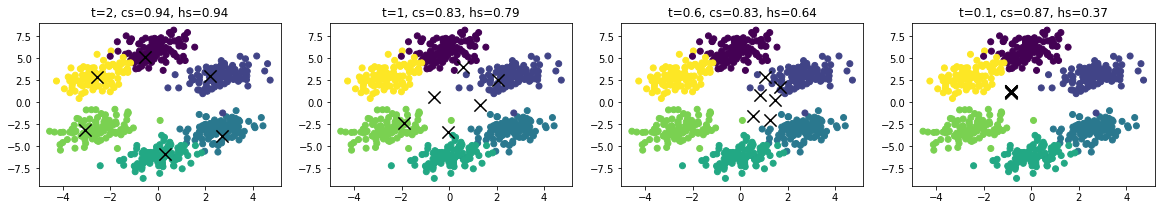

In [31]:
fig = plt.figure(figsize=(20,3))

plt.subplot(1, 4, 1)

kohonen = model(N,M, weights, t = 2, metric='gaussian')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')


plt.subplot(1, 4, 2)

kohonen = model(N,M, weights, t = 1, metric='gaussian')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')

plt.subplot(1, 4, 3)

kohonen = model(N,M, weights, t = 0.6, metric='gaussian')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')

plt.subplot(1, 4, 4)
kohonen = model(N,M, weights, t = 0.1, metric='gaussian')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')

plt.show()

Wizualnie najlepsze pokrycie dają klastry dla `t=2`, czyli takiego poza naszym przedziałem `[0.1.1]`. Najmniejsze wygaszenie jest dla tego problemu najlepsze. Sprawdźmy jak dobre jest poprzez miarę homogenity score (im wyższa tym lepiej).

In [12]:
kohonen = model(N,M, weights, t = 2, metric='gaussian')
kohonen.train(x, 100)
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))

0.9088808950763339


Text(0.5, 1.0, 't=1')

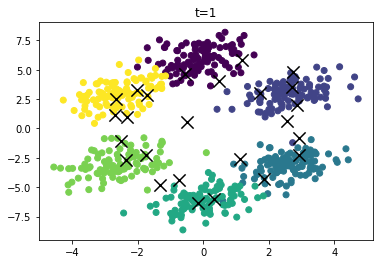

In [33]:
train_df = pd.read_csv('../data/hexagon.csv')
x = np.asarray(train_df.iloc[:, [0, 1]])

N, M = 5, 5
weights = np.random.uniform(np.min(x), np.max(x), size=(N * M, x.shape[1]))

kohonen = model(N,M, weights, t = 1, metric='gaussian')
kohonen.train(x, 200)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
plt.title(f't={kohonen.t}')


Widzimy, że dla większej ilości nodów, pokrycie jest również dość dobre. 

In [34]:
kohonen = model(N,M, weights, t = 2, metric='gaussian')
kohonen.train(x, 100)
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))


0.9580934139237425
0.5432355482681082


<ipython-input-14-a107ca7dfd5b>:28: RuntimeWarning: overflow encountered in square
  return np.sqrt(((x - y) ** 2).sum())
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: overflow encountered in add
  self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-14-a107ca7dfd5b>:28: RuntimeWarning: overflow encountered in square
  return np.sqrt(((x - y) ** 2).sum())
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: overflow encountered in add
  self.weights[i] = self.weights[i] + self.m

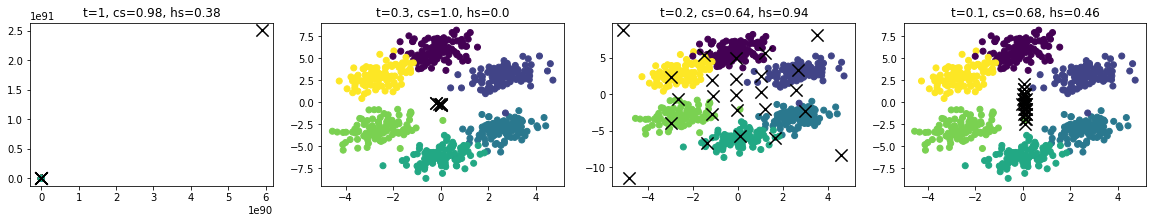

In [37]:
fig = plt.figure(figsize=(20,3))

plt.subplot(1, 4, 1)

kohonen = model(N,M, weights, t = 1, metric='gaussian2')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')


plt.subplot(1, 4, 2)

kohonen = model(N,M, weights, t = 0.3, metric='gaussian2')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')

plt.subplot(1, 4, 3)

kohonen = model(N,M, weights, t = 0.2, metric='gaussian2')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')

plt.subplot(1, 4, 4)
kohonen = model(N,M, weights, t = 0.1, metric='gaussian2')
kohonen.train(x, 100)

plt.scatter(train_df['x'], train_df['y'], c=train_df['c'])
plt.scatter(kohonen.weights[:,0], kohonen.weights[:,1], marker='x', c='black', s= 150)
cs = metrics.completeness_score(train_df['c'], kohonen.predict(x) )
hs = metrics.homogeneity_score(train_df['c'], kohonen.predict(x))
plt.title(f't={kohonen.t}, cs={round(cs,2)}, hs={round(hs,2)}')

plt.show()

Tutaj najlepsze okazuje się najlepsze `t=0.4`

In [38]:
kohonen = model(N,M, weights, t = 0.4, metric='gaussian2')
kohonen.train(x, 100)
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-14-a107ca7dfd5b>:28: RuntimeWarning: overflow encountered in square
  return np.sqrt(((x - y) ** 2).sum())
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: overflow encountered in add
  self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: invalid value encountered in add
  self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])


0.0
1.0


Tutaj metryka jest mniejsza niż w poprzednim przypadku

## Cube 

In [39]:
train_df = pd.read_csv('../data/cube.csv')
x = np.asarray(train_df.iloc[:, 0:3])
N, M = 4, 2
weights = np.random.uniform(np.min(x), np.max(x), size=(N * M, x.shape[1]))

In [40]:
train_df.head()

,x,y,z,c
0,0.187781,0.239537,0.382492,0
1,-1.308979,-0.143321,-0.966648,0
2,-0.987613,0.679918,-0.037552,0
3,0.924980,0.607235,-0.146856,0
4,-0.098663,0.004329,-0.588876,0


In [41]:
train_df.c.max()

7

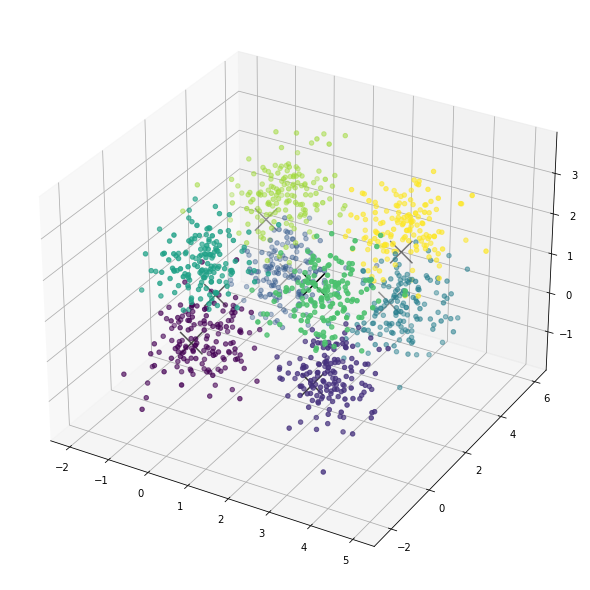

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,8))

kohonen = model(N,M, weights, t = 2, metric='gaussian')
kohonen.train(x, 100)

ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)


In [45]:
kohonen = model(N,M, weights, t = 0.4, metric='gaussian2')
kohonen.train(x, 100)
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-14-a107ca7dfd5b>:28: RuntimeWarning: overflow encountered in square
  return np.sqrt(((x - y) ** 2).sum())
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: overflow encountered in add
  self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: invalid value encountered in add
  self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])


0.0
1.0


Patrząc na to, że jest aż 8 klas, to jest do satysfakcjonujący wynik! 

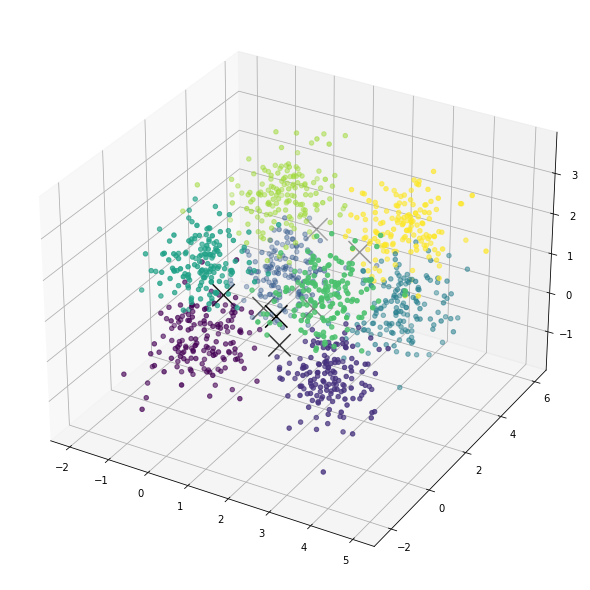

In [46]:
kohonen = model(N,M, weights, t = 1, metric='gaussian')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [47]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.7417977259076328
0.7869097323320101


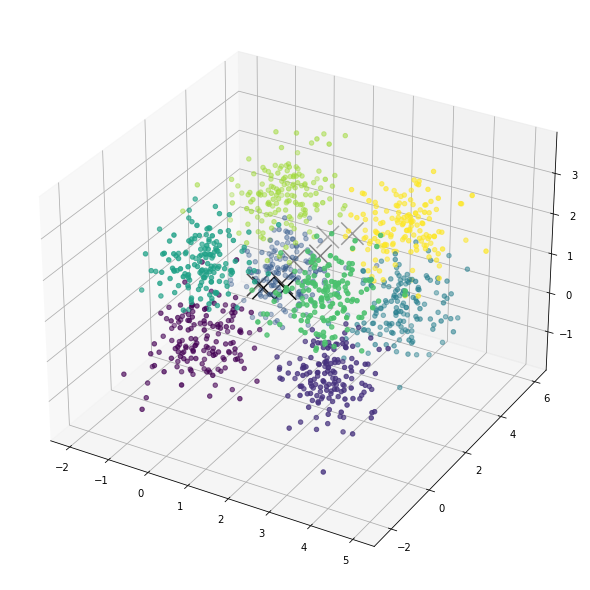

In [48]:
kohonen = model(N,M, weights, t = 0.6, metric='gaussian')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [49]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.6675505242429465
0.7635890833371944


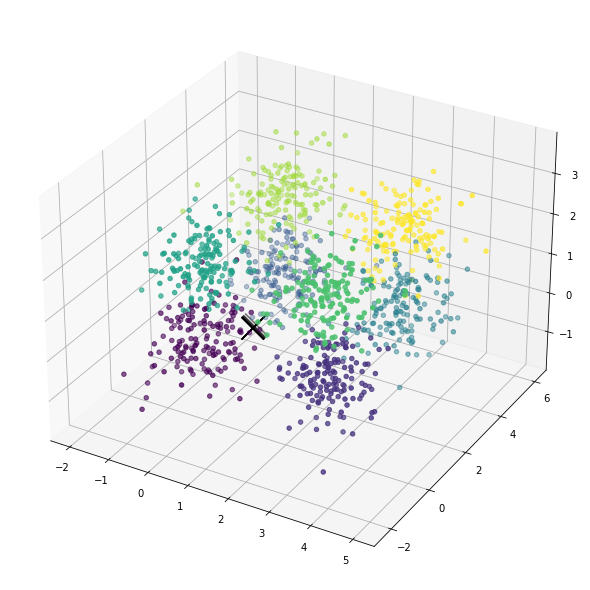

In [50]:
kohonen = model(N,M, weights, t = 0.1, metric='gaussian')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [51]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.2609246104563003
0.5584238239688526


<ipython-input-14-a107ca7dfd5b>:28: RuntimeWarning: overflow encountered in square
  return np.sqrt(((x - y) ** 2).sum())
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-14-a107ca7dfd5b>:21: RuntimeWarning: overflow encountered in add
  self.weights[i] = self.weights[i] + self.metric(self.euclidean(np.array([i//self.M, i % self.M]), np.array([i_j//self.M,  i_j % self.M])), self.t) * np.exp(-(e+1)/epochs ) * (x - self.weights[i])


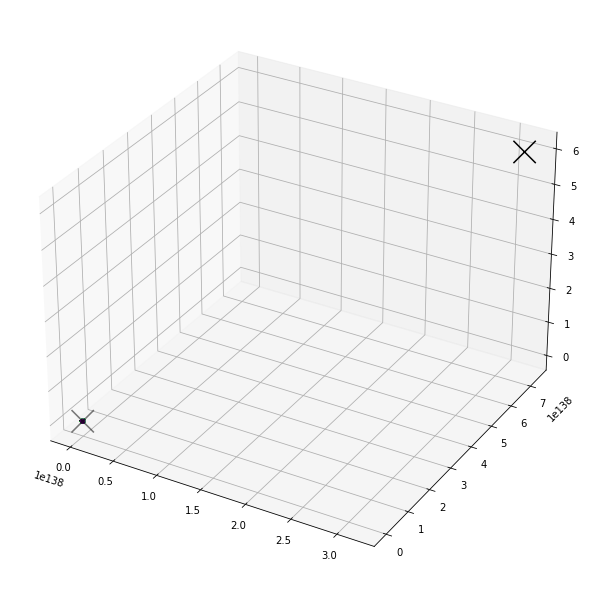

In [52]:
kohonen = model(N,M, weights, t = 1, metric='gaussian2')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [53]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.0
1.0


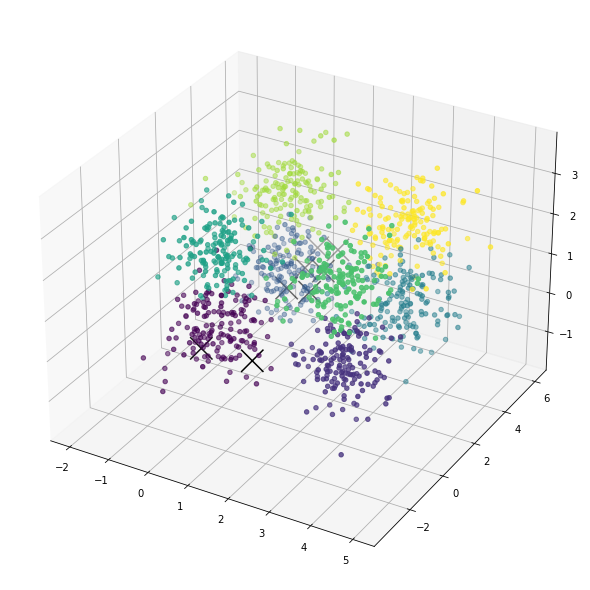

In [54]:
kohonen = model(N,M, weights, t = 0.3, metric='gaussian2')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [55]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.637143350410008
0.8223840138177889


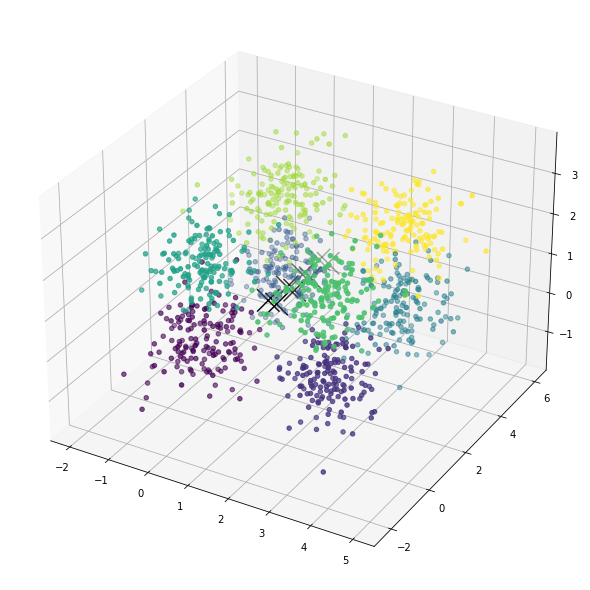

In [56]:
kohonen = model(N,M, weights, t = 0.2, metric='gaussian2')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [57]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.6496188134708305
0.8636076411521864


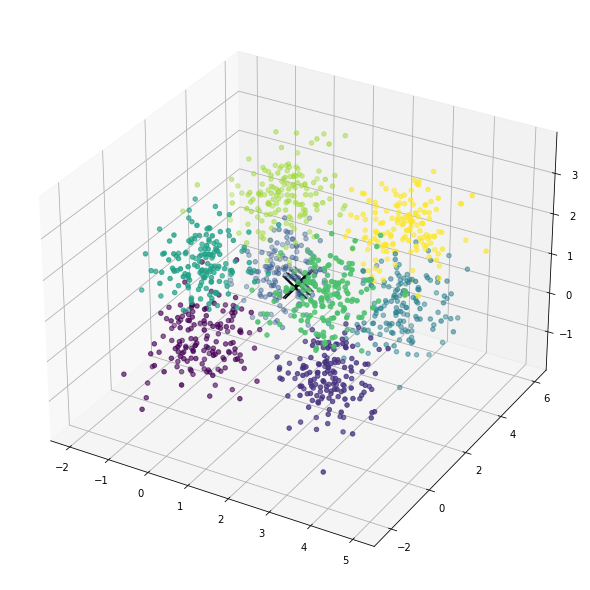

In [58]:
kohonen = model(N,M, weights, t = 0.1, metric='gaussian2')
kohonen.train(x, 100)

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
ax.scatter(train_df['x'], train_df['y'], train_df['z'], c=train_df['c'])
ax.scatter(kohonen.weights[:,0], kohonen.weights[:,1], kohonen.weights[:,2], marker='x', c='black', s= 500)

In [59]:
result = kohonen.predict(x)
print(metrics.homogeneity_score(train_df['c'], result ))
print(metrics.completeness_score(train_df['c'], result ))

0.6519656450009443
0.9740457135228711


# Wnioski
Sieci wymagają odpowiedniego dobrania parametru `t` aby dobrze działały. Mając to na uwadze spisują się dość dobrze. Aczkolwiek moim zdaniem lepiej wypada zwykła metryka completeness_scoreniż jej podwójna pochodna pomnożona przez `-1`. Jest bardzo dobra i nie odpycha zbytnio neuronów.